# CSE455/CSE552 – Machine Learning (Spring 2024) Homework #3

Description: The aim of this homework is to explore feature reduction techniques using PCA (principle component analysis). Use the following data for testing your implementation: (MNIST Digit Recogntion Data – available through mnist.load_data() in Keras).

#  Importing Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#  Loading the datasets

In [9]:
from keras.datasets import mnist # MNIST dataset is included in Keras

In [5]:
# df = mnist.load_data()

In [10]:
# The MNIST data is split between 60,000 training images and 10,000 test image
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


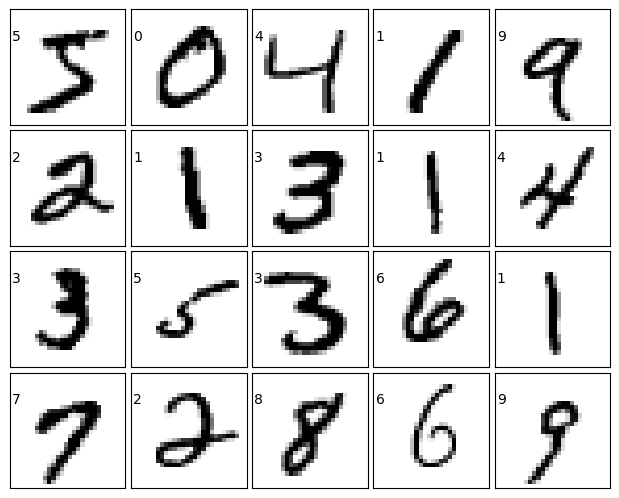

In [11]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

# Part I:

Part I: Implementing PCA
Write the function pca(X) that takes an 𝑛×𝑛 matrix and returns mean, weights and vectors. The mean is the mean of the columns of X. The principal components of X are in vectors. The corresponding eigenvalues are in weights. You should use only a function performing SVD and nothing else from any Python libraries.

In [15]:
import numpy as np

def pca(X):
    # Calculate mean of columns
    mean = np.mean(X, axis=0)
    
    # Center the data
    X_centered = X - mean
    
    # Perform Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(X_centered)
    
    # Extract principal components (eigenvectors) and eigenvalues
    vectors = Vt.T
    weights = S**2 / (X.shape[0] - 1)  # Dividing by (n - 1) for unbiased estimation
    
    return mean, weights, vectors

# Test the function with MNIST Digit Recognition Data
from keras.datasets import mnist

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data for PCA (flatten images)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply PCA
mean, weights, vectors = pca(X_train_flat)

# Print results
print("Mean of the columns of X:")
print(mean)
print("\nEigenvalues (weights):")
print(weights)
print("\nEigenvectors (principal components):")
print(vectors)


Mean of the columns of X:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
 4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
 1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
 1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
 5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
 6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-0

# Results

 # Conclusions

# Part II:

Part II: Using PCA before Classification
Using only a portion of the data (e.g., about 1000 images randomly chosen from the training set) perform PCA and train a classifier.
•
Using the MNIST data, do a series of PCA-based reductions on the data. This should test at least four different values for the number of components chosen.
•
Plot the class locations on the test data on a 2D map with horizontal axis as the first principal and with vertical axis as the second principal component (like the one discussed in class). Do the same for the first and third principal components. This should show you some clustering of the labels (better than if you just chose any two pixels).
•
Feed the reduced features to a Random Forest Decision tree and show classification results using cross-validation. You should use all the data in training. This should be repeated for a few numbers of components extracted by PCA.

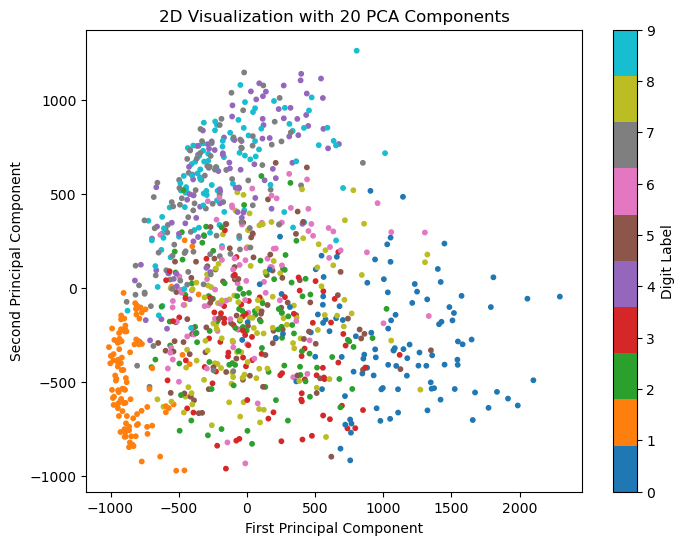

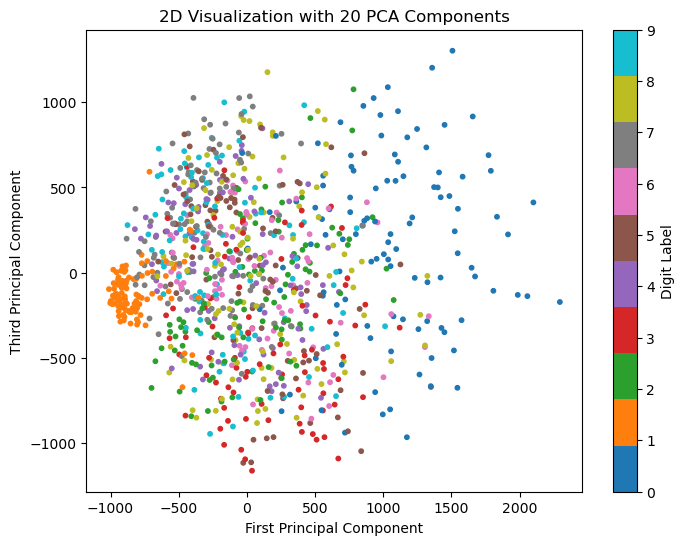

Average Accuracy with 20 PCA Components: 0.8400


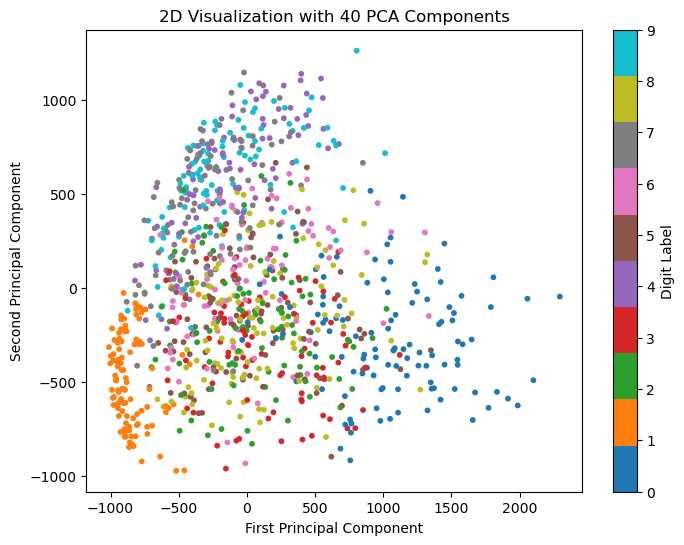

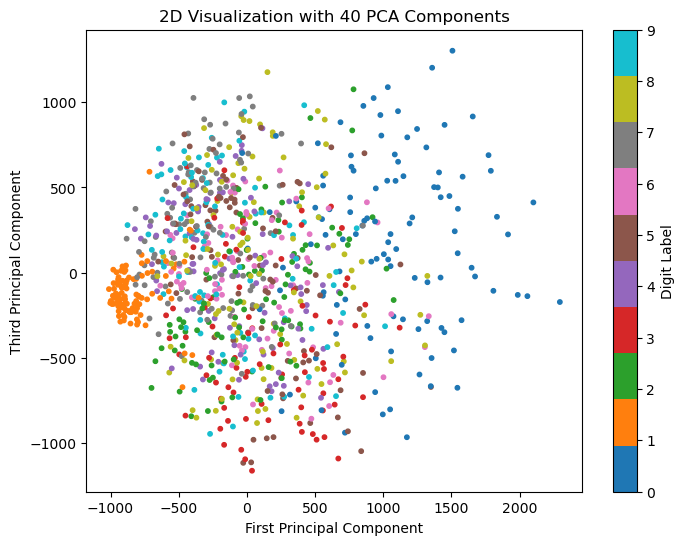

Average Accuracy with 40 PCA Components: 0.8590


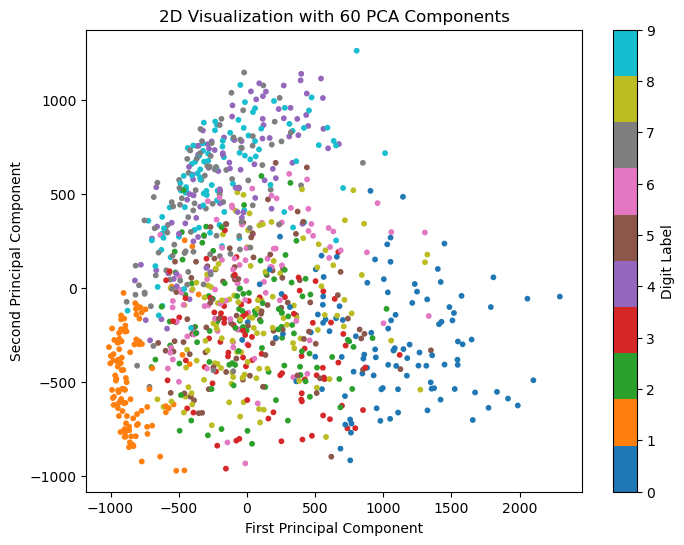

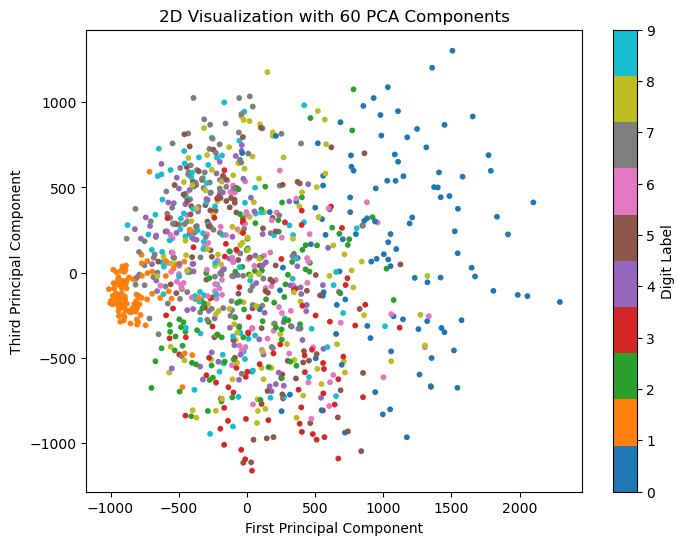

Average Accuracy with 60 PCA Components: 0.8440


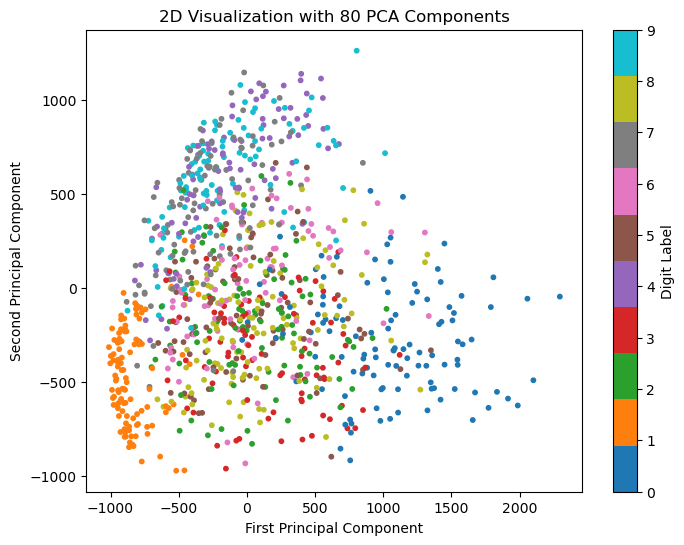

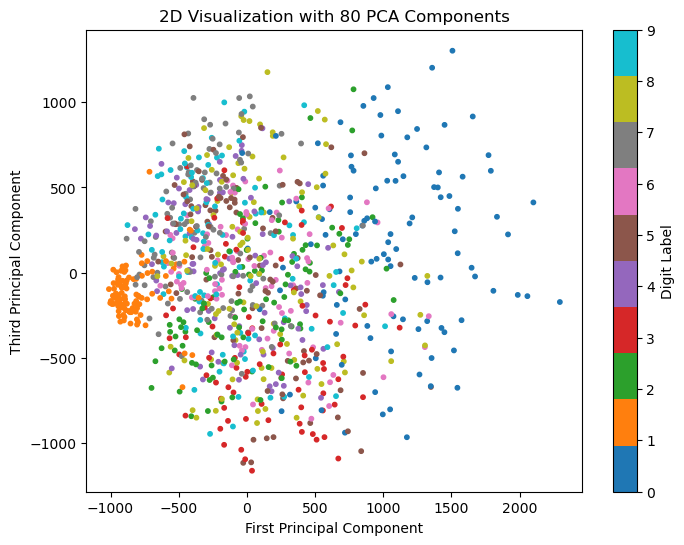

Average Accuracy with 80 PCA Components: 0.8520


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from keras.datasets import mnist

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Select a subset of training data (1000 images)
np.random.seed(42)  # For reproducibility
indices = np.random.choice(X_train.shape[0], 1000, replace=False)
X_train_subset = X_train[indices]
y_train_subset = y_train[indices]

# Flatten images for PCA
X_train_flat = X_train_subset.reshape(X_train_subset.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with different numbers of components
num_components_list = [20, 40, 60, 80]
for num_components in num_components_list:
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train_flat)
    
    # Visualize data in 2D space using the first and second principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_subset, cmap='tab10', s=10)
    plt.colorbar(label='Digit Label')
    plt.title(f'2D Visualization with {num_components} PCA Components')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
    # Visualize data in 2D space using the first and third principal components
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train_subset, cmap='tab10', s=10)
    plt.colorbar(label='Digit Label')
    plt.title(f'2D Visualization with {num_components} PCA Components')
    plt.xlabel('First Principal Component')
    plt.ylabel('Third Principal Component')
    plt.show()
    
    # Train Random Forest classifier using the reduced features from PCA
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(clf, X_train_pca, y_train_subset, cv=5)
    print(f"Average Accuracy with {num_components} PCA Components: {np.mean(scores):.4f}")


# Results

# Conclusions